# Test EuroSciVac for DMOE 4.0

In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis 
from ontodot.ontodot import OntoVis

In [4]:
def printH(s):
    the_line = "=" * (len(s)+1)
    print(f"{s}:\n{the_line}")


<br>
Test import of a sane ontology like MIO. <br>


In [5]:
mio=Namespace("http://www.ddmd.io/mio/")

In [6]:
base_path = '../MIO/'
catalog_file = 'catalog-v001.xml'

In [7]:
mio_manager = OntologyManager(base_path, catalog_file)
mio_manager.parse_catalog()
mio_manager.load_ontology()

name= http://ddmd.io/mio/ uri= ./mio/mio.ttl
Loaded ontology: http://ddmd.io/mio/


In [8]:
# there is one graph, we also know the name space,
g=mio_manager.ontology_graphs["http://ddmd.io/mio/"]

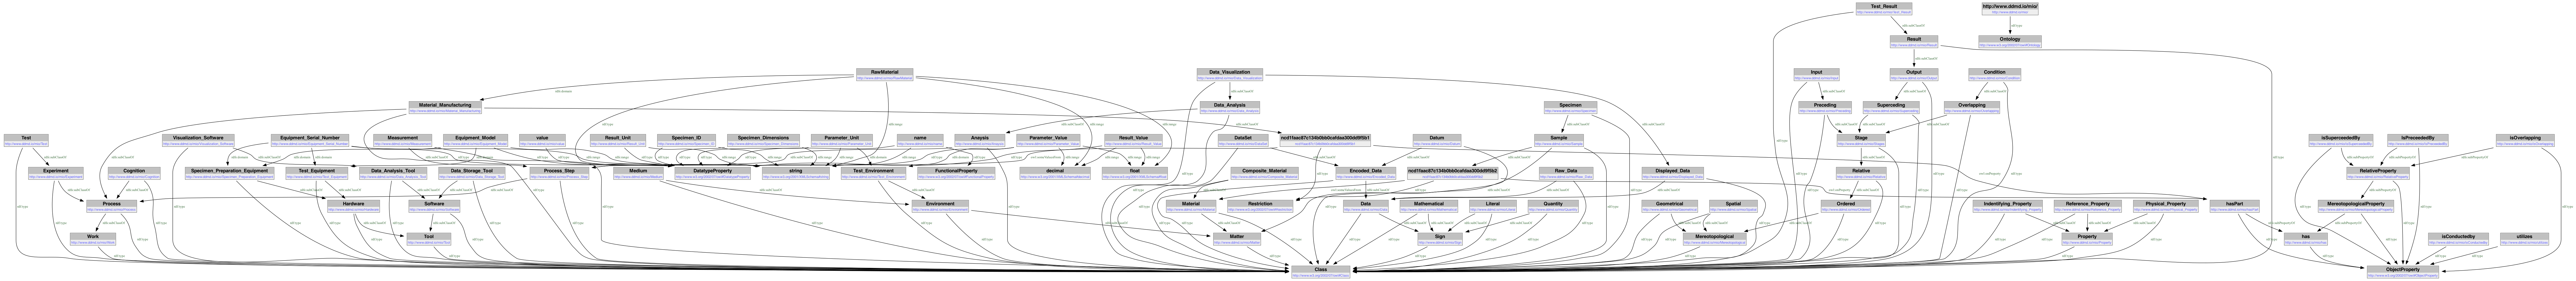

In [9]:
# plot, and check the OntoVis.Output folder for all images and dot files. 
vis(g, max_string_length=5)

In [10]:
# now load manually (as we did not add it in the catalog yet) the EurosciVac
evoc_g=Graph()
evoc_ns=Namespace('http://data.europa.eu/8mn/euroscivoc/')
evoc_path = "/Users/adham/dev/dome/Ontology-matters/external/EuroSciVoc-skos-ap-eu_1.3.ttl"
evoc_g.parse(evoc_path)
# we could add it to mio_manager manually actually, then use it as we want, 


<Graph identifier=N71cb0520880347d2a113481da7620364 (<class 'rdflib.graph.Graph'>)>

In [32]:
for s,p,o in evoc_g:
    if p ==URIRef("http://www.w3.org/2004/02/skos/core#prefLabel", lang="en"):
        print(o)
        

TypeError: URIRef.__new__() got an unexpected keyword argument 'lang'

# this is not an ontology, but a bunch of individuals! so lets ontologise it actually, and this should be investigated, why do they use it this way?

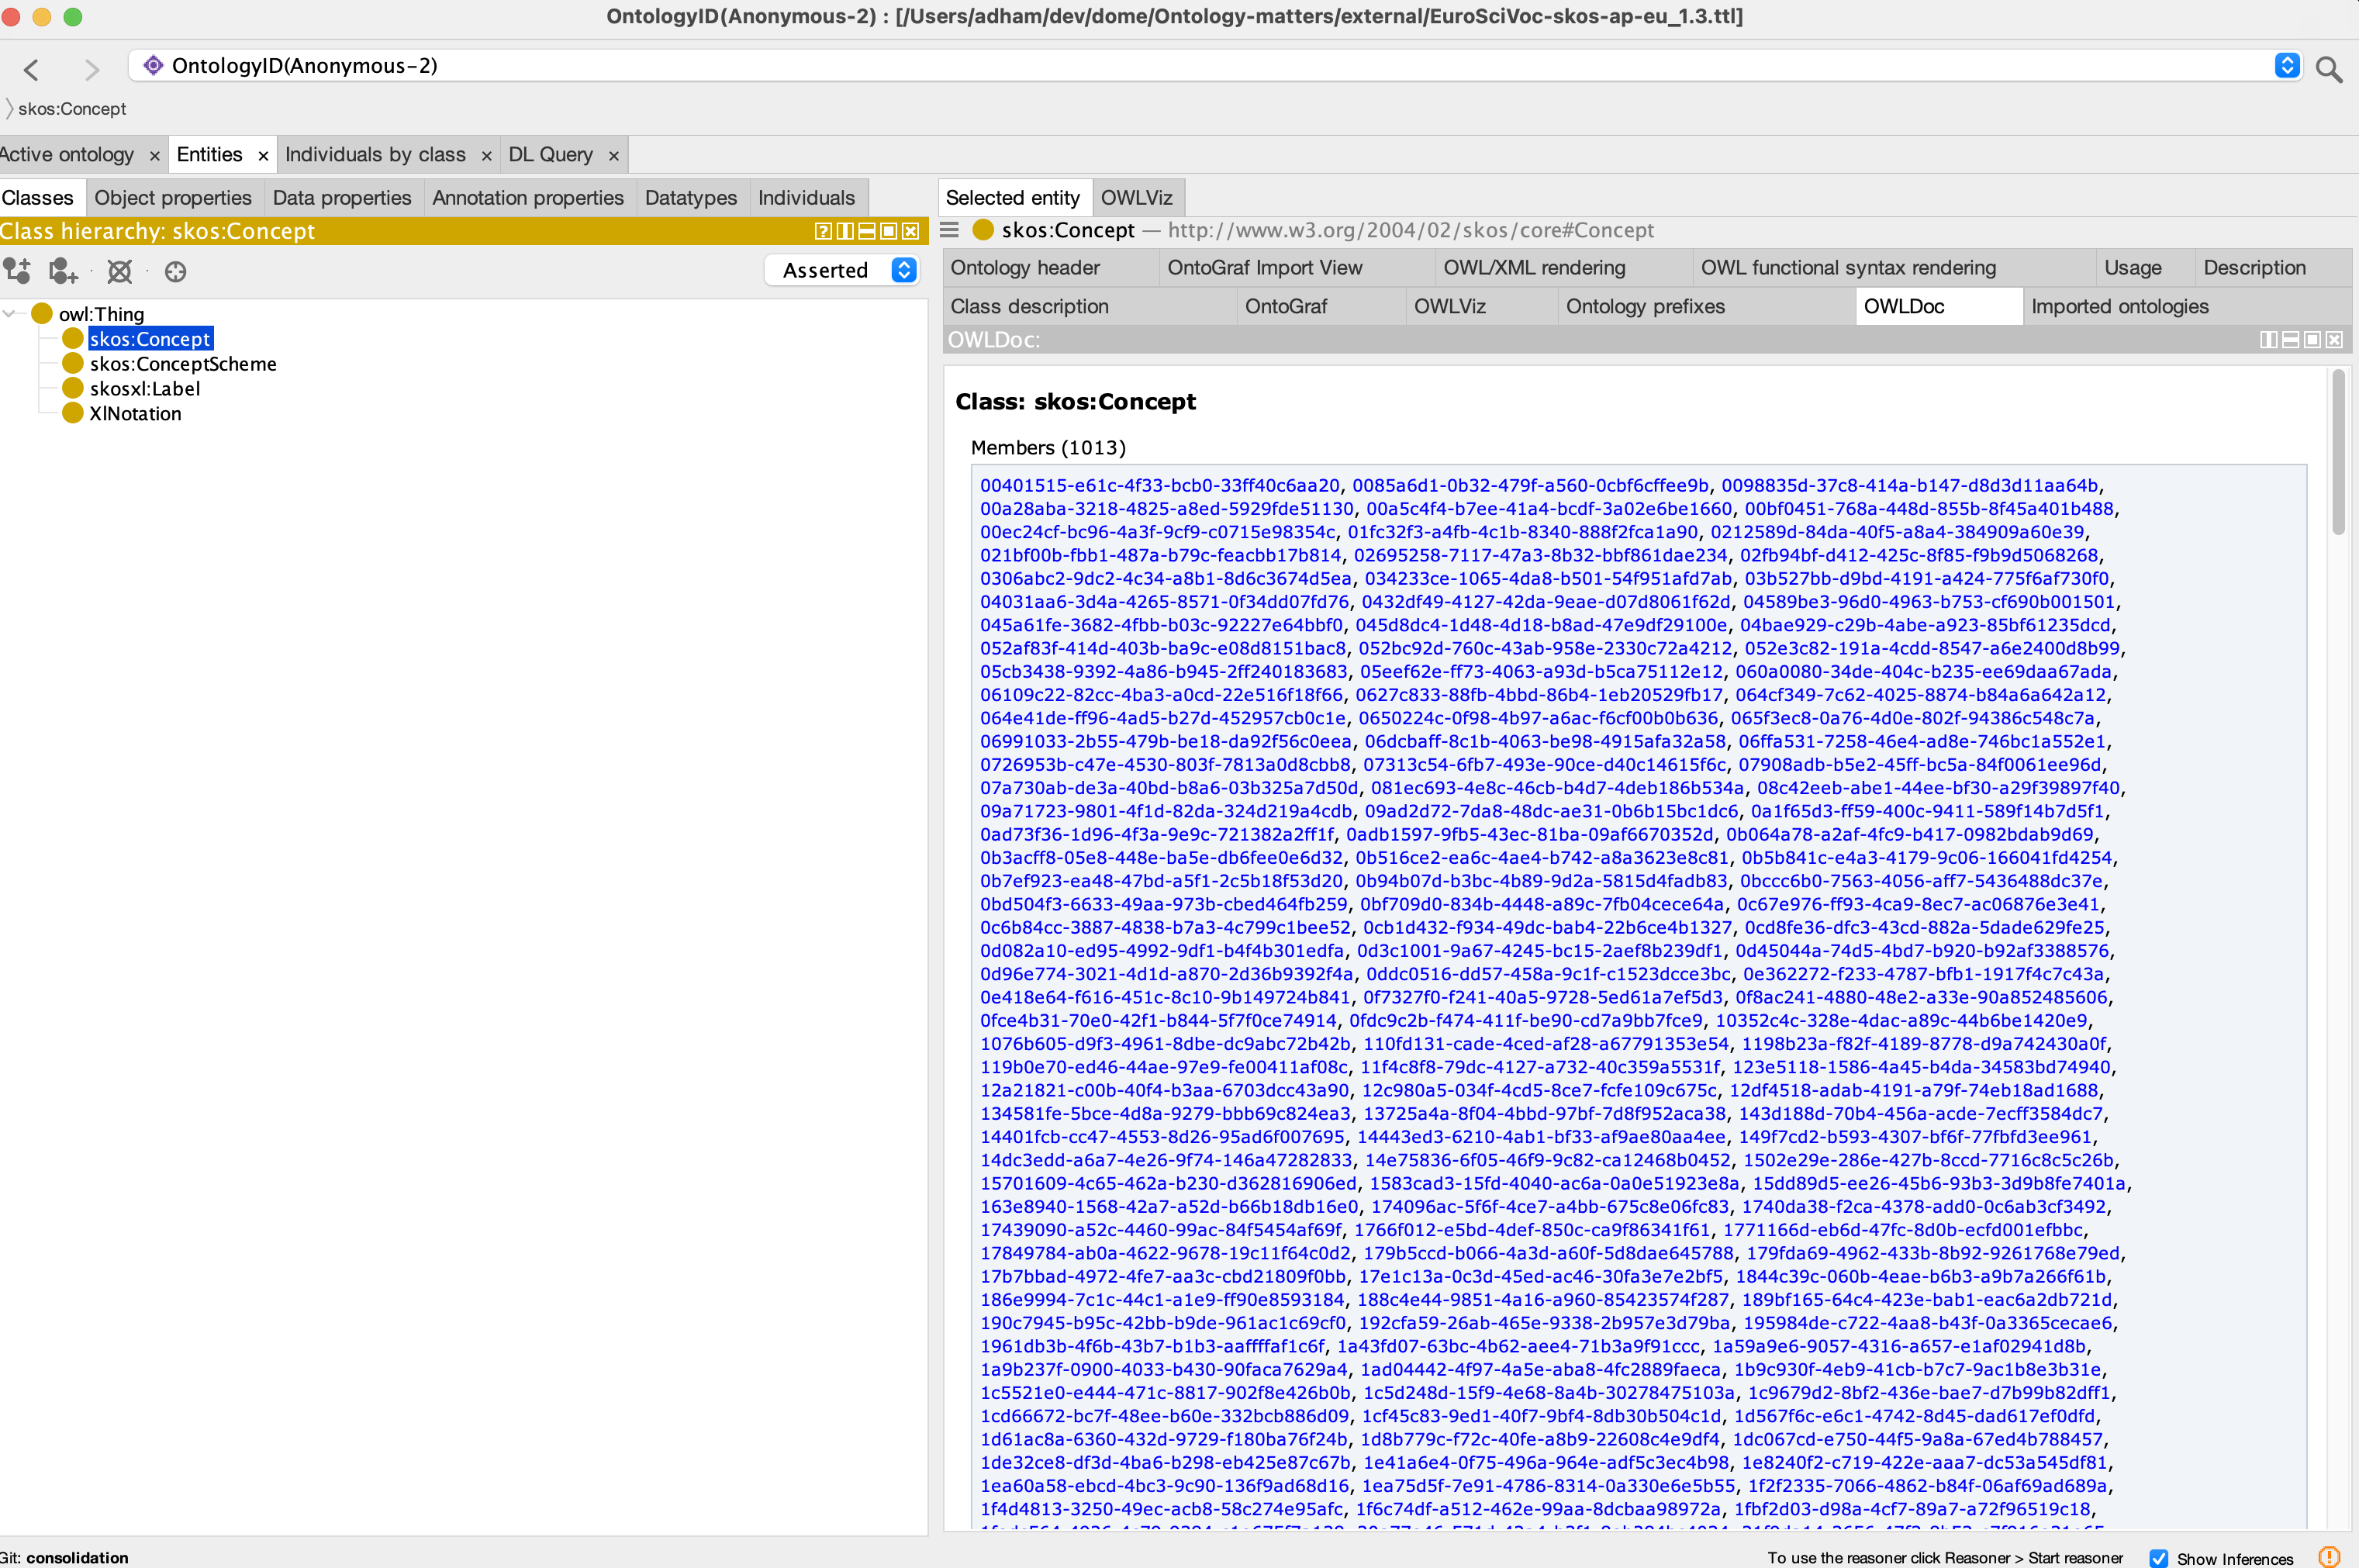

even protege suffers dealing with this so called ontology, so we will extract the labels and see what to do with them. 